#**Análise e Predição de Mudança de Emprego**
Segundo mini projeto para os trainees do Turing Academy, o programa de capacitação dos novos membros do Turing USP.

A ideia é exercitar os conceitos aprendidos durante o Academy inteiro, que envolvem limpeza, análise e predição de dados! A base escolhida pra análise traz informações sobre alguns cientistas de dados, e foi dividida entre treino e teste, para que criássemos um modelo que prevê se um deles quer ou não mudar de emprego.


## **Limpeza e Análise dos Dados**

Primeiro começo dando uma olhada nos dados com que vou trabalhar.


### **Limpeza dos Dados**

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [322]:
train = pd.read_excel('/content/train.xlsx')
test = pd.read_excel('/content/test.xlsx')

#### **Treino**

Checo se existe algum ID duplicado entre os candidatos:

In [323]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,9.200000e-01,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,7.760000e+15,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,6.240000e+02,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,7.890000e+02,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,7.670000e+02,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [324]:
train[train.duplicated('enrollee_id')]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


Como não tem nenhum, transformo os IDs nos índices das linhas e dou uma olhada nos tipos de dados presentes.

In [325]:
train.set_index('enrollee_id',inplace=True)
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,9.200000e-01,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,7.760000e+15,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,6.240000e+02,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,7.890000e+02,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,7.670000e+02,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [326]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


##### **Categóricos**

Começo a limpeza pelos dados categóricos.

In [327]:
train.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


**Cidades**

Como não há nenhum valor faltante, só é preciso checar se algum deles é estranho, o que não é o caso.

In [328]:
print(train['city'].unique())

['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city_117'

**Gênero**

Além dos valores faltantes, a quantidade de 'Other' é muito pouca (menos de 1%), então é melhor substitui-los. Substituo os dois problemas por 'Male', que é a moda da categoria, visto que a proporção de 'Male' e 'Female' para os dados que estavam preenchidos inicialmente, fica similar depois das substuições.

In [329]:
print(train['gender'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['gender'].isna()]))

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Quantidade de valores nan:  4508


In [330]:
train["gender"].replace(["Other",np.nan], train['gender'].mode()[0], inplace=True) 

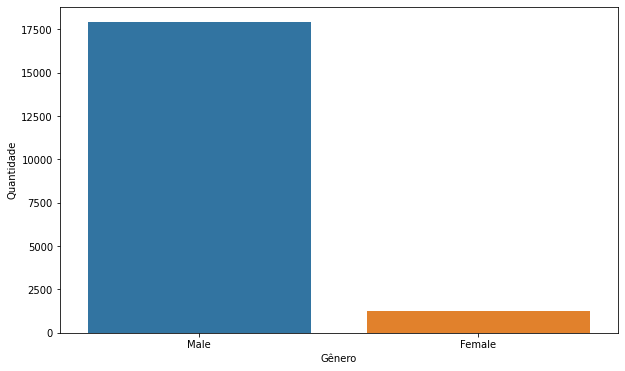

In [331]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['gender']).set(xlabel='Gênero',ylabel='Quantidade')
plt.show()

**Experiência Relevante**

O mesmo esquema das cidades, tudo nos conformes.

In [332]:
print(train['relevent_experience'].unique())

['Has relevent experience' 'No relevent experience']


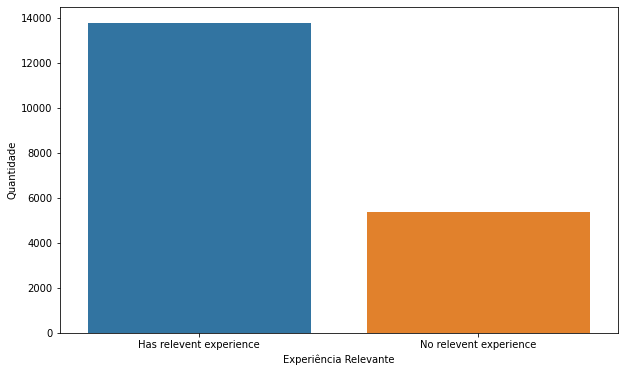

In [333]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['relevent_experience']).set(xlabel='Experiência Relevante',ylabel='Quantidade')
plt.show()

**Tipo de Curso Matriculado**

São poucos os valores faltantes, então retiro eles do dataset

In [334]:
print(train['enrolled_university'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['enrolled_university'].isna()]))

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Quantidade de valores nan:  386


In [335]:
train.dropna(subset=['enrolled_university'], inplace=True)


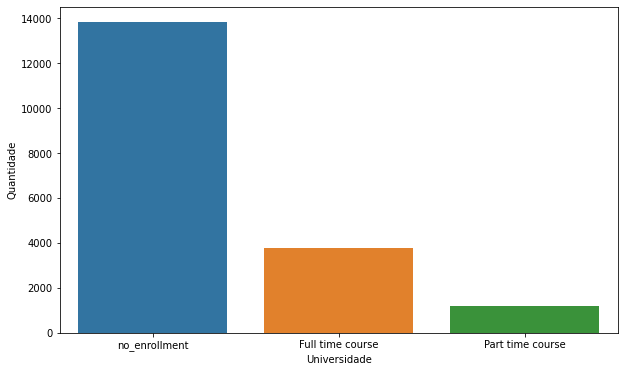

In [336]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['enrolled_university']).set(xlabel='Universidade',ylabel='Quantidade')
plt.show()

**Nível Escolaridade**

Continuo da mesma forma por aqui.

In [337]:
print(train['education_level'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['education_level'].isna()]))

Graduate          11427
Masters            4308
High School        1970
Phd                 408
Primary School      299
Name: education_level, dtype: int64

Quantidade de valores nan:  360


In [338]:
train.dropna(subset=['education_level'], inplace=True)

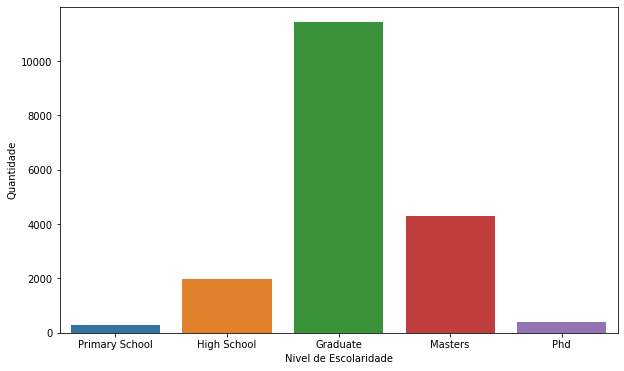

In [339]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['education_level'],order=['Primary School','High School','Graduate','Masters','Phd']).set(xlabel='Nivel de Escolaridade',ylabel='Quantidade',)
plt.show()

**Disciplina de Graduação**

Como são muitos os NaN, checo se a substituição pela moda vai alterar as proporções 

In [340]:
print(train['major_discipline'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['major_discipline'].isna()]))

STEM               14284
Humanities           660
Other                377
Business Degree      325
Arts                 251
No Major             219
Name: major_discipline, dtype: int64

Quantidade de valores nan:  2296


In [341]:
a = len(train[(train['major_discipline']=='STEM')&(train['target']==1)])
b = len(train[(train['major_discipline']=='STEM')&(train['target']==0)])

print(f'% de STEM que mudaram de emprego: {round(a/(a+b),2)}%')

% de STEM que mudaram de emprego: 0.26%


In [342]:
a = len(train[(train['major_discipline']=='STEM')&(train['target']==1)])+len(train[(train['major_discipline'].isna())&(train['target']==1)])
b = len(train[(train['major_discipline']=='STEM')&(train['target']==0)])+len(train[(train['major_discipline'].isna())&(train['target']==0)])
print(f'% de STEM que mudaram de emprego: {round(a/(a+b),2)}%')

% de STEM que mudaram de emprego: 0.25%


Como a mudança entre proporções não é tão grande, deixo dessa forma

In [343]:
train['major_discipline'].replace({np.nan:train['major_discipline'].mode()[0]},  inplace=True) 

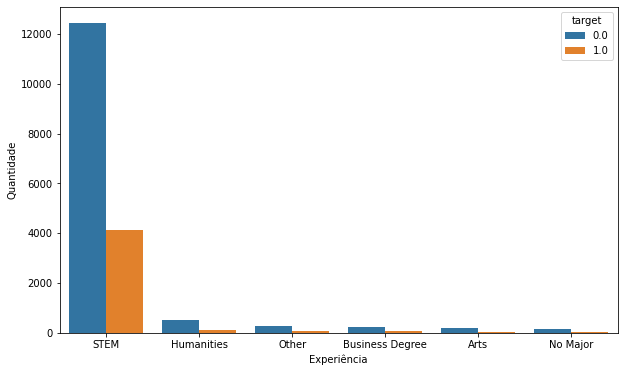

In [344]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['major_discipline'],order=train['major_discipline'].value_counts().index, hue=train['target']).set(xlabel='Experiência',ylabel='Quantidade',)
plt.show()

**Experiência**

Menos de 1% dessa coluna são np.nan, então só retiro esses valores.

In [345]:
print('Contagem: \n%s' %(train['experience'].value_counts()))
print('\nQuantidade de valores nan: ', len(train[train['experience'].isna()]))

Contagem: 
>20    3210
5      1367
4      1342
3      1270
6      1161
2      1030
7       995
10      954
9       951
8       779
15      670
11      654
14      573
1       505
16      496
12      481
<1      480
13      391
17      333
19      299
18      276
20      143
Name: experience, dtype: int64

Quantidade de valores nan:  52


In [346]:
train = train[train['experience'].notna()]

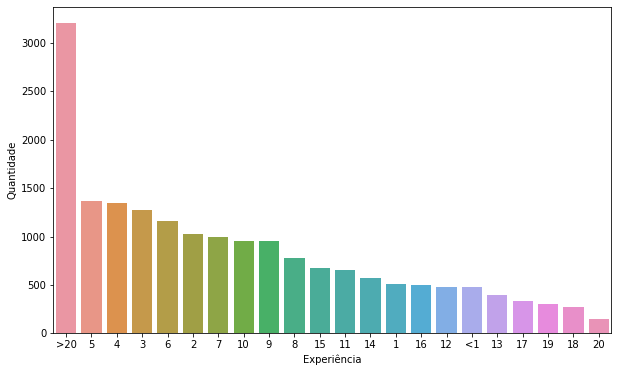

In [347]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['experience'],order=train['experience'].value_counts().index).set(xlabel='Experiência',ylabel='Quantidade',)
plt.show()

**Tamanho da Empresa**

A categoria '10/49' está com o simbolo trocado, já que provalvemente deveria ser um '-'. 

In [348]:
print(train['company_size'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['experience'].isna()]))

50-99        2995
100-500      2509
10000+       1988
10/49        1424
1000-4999    1299
<10          1268
500-999       858
5000-9999     549
Name: company_size, dtype: int64

Quantidade de valores nan:  0


In [349]:
train.loc[train['company_size'] == 'female','company_size'] = '10-49'

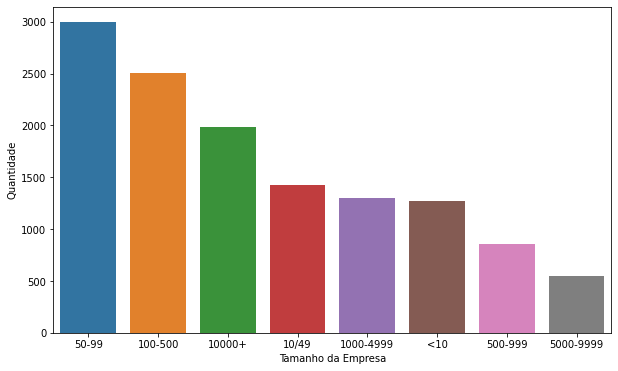

In [350]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['company_size'],order=train['company_size'].value_counts().index).set(xlabel='Tamanho da Empresa',ylabel='Quantidade',)
plt.show()

**Tipo da Companhia**

Como aqui também há muitos dados faltantes, também chego se vai ter alguma mudança significativa:

In [351]:
print(train['company_type'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['company_type'].isna()]))

Pvt Ltd                9583
Funded Startup          984
Public Sector           930
Early Stage Startup     578
NGO                     508
Other                   118
Name: company_type, dtype: int64

Quantidade de valores nan:  5659


In [352]:
a = len(train[(train['company_type']=='Pvt Ltd')&(train['target']==1)])
b = len(train[(train['company_type']=='Pvt Ltd')&(train['target']==0)])

print(f'% de Pvt Ltd que  mudaram de emprego: {round(a/(a+b),2)}%')

% de Pvt Ltd que  mudaram de emprego: 0.18%


In [353]:
a = len(train[(train['company_type']=='Pvt Ltd')&(train['target']==1)])+len(train[(train['company_type'].isna())&(train['target']==1)])
b = len(train[(train['company_type']=='Pvt Ltd')&(train['target']==0)])+len(train[(train['company_type'].isna())&(train['target']==0)])

print(f'% de Pvt Ltd que  mudaram de emprego: {round(a/(a+b),2)}%')

% de Pvt Ltd que  mudaram de emprego: 0.26%


Como há uma mudança bem significante na porcentagem depois da mudança, isso significa que os dados NaN tem comportamento bem diferente dos originais da categoria Pvt Ltd, o que pode atrapalhar o modelo. Portanto, vou retirá-los do dataset.

In [354]:
train.dropna(subset=['company_type'], inplace=True)

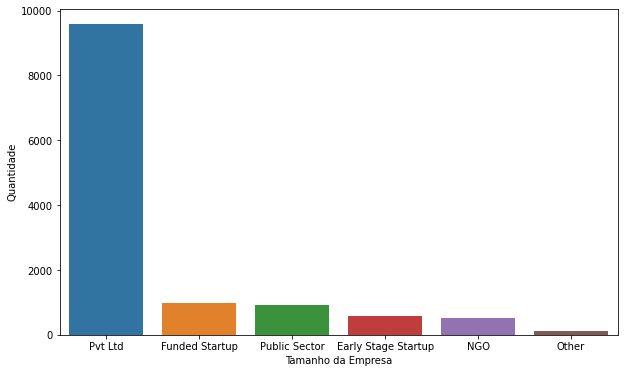

In [355]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=train['company_type'],order=train['company_type'].value_counts().index).set(xlabel='Tamanho da Empresa',ylabel='Quantidade',)
plt.show()

**Tempo em anos desde o último trabalho**

Os 399 dos valores faltantes são pouco mais de 2% do total da amostra, então só retiro essas linhas.

In [356]:
print(train['last_new_job'].value_counts())
print('\nQuantidade de valores nan: ', len(train[train['last_new_job'].isna()]))

1        5488
>4       2506
2        2155
never     803
4         795
3         791
Name: last_new_job, dtype: int64

Quantidade de valores nan:  163


In [357]:
train = train[train['last_new_job'].notna()]

##### **Númericos**
Não há nenhum dado faltante aqui, apenas um problema com a coluna que contém o índice de desenvolvimento das cidades, que deveriam ser valores entre 0 e 1.

In [358]:
train.describe()

,city_development_index,training_hours,target
count,1.253800e+04,12538.000000,12538.000000
mean,1.538298e+15,65.575291,0.179215
std,3.592843e+15,60.586156,0.383548
min,5.500000e-01,1.000000,0.000000
25%,9.200000e-01,23.000000,0.000000
50%,6.240000e+02,47.000000,0.000000
75%,8.950000e+02,89.000000,0.000000
max,4.870000e+16,336.000000,1.000000


**Indice de Desenvolvimento da Cidade**

Para tratar o problema, uso a função auxiliar abaixo:

In [359]:
def to_scale(num):
  notation_parts = f'{num:e}'.split('e')
  coef = notation_parts[0]
  return float(coef)*10**-1

In [360]:
train['city_development_index'] = train['city_development_index'].apply(to_scale)

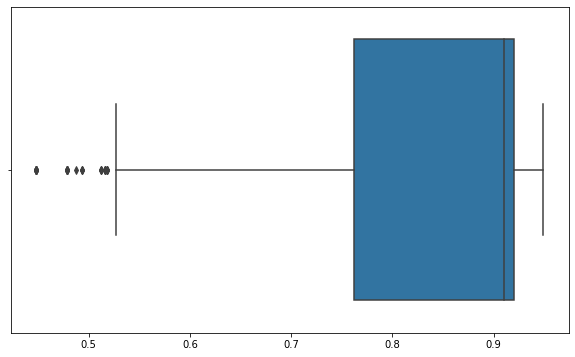

In [361]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x=train['city_development_index']).set(
    xlabel=''
)
plt.show()

Existem alguns poucos outliers, então retiro suas linhas

In [362]:
first_quantile = train['city_development_index'].quantile(0.25)
third_quantile = train['city_development_index'].quantile(0.75)
train = train[train['city_development_index']>first_quantile-1.5*(third_quantile-first_quantile)]

**Horas treinadas**

Vamos dar uma olhada na distribuição das horas de treino entre cada candidato

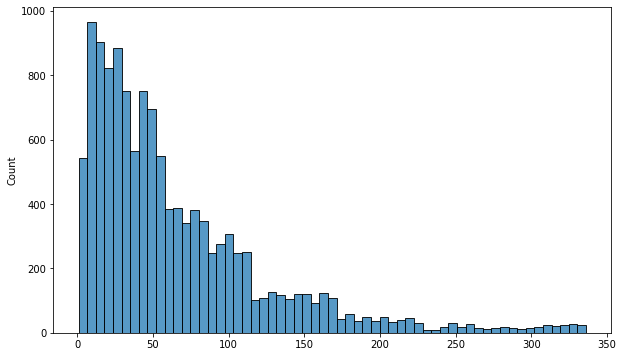

In [363]:
fig = plt.figure(figsize=(10,6))
sns.histplot(x=train['training_hours']).set(
    xlabel=''
)
plt.show()

#### **Teste**
Agora faço o mesmo processo nos dados pra teste. Já checo se há algum ID repetido:

In [364]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,8.270000e+15,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,9.200000e-01,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,6.240000e+02,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,8.270000e+15,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,9.200000e-01,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [365]:
test[test.duplicated('enrollee_id')]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


Como não tem nenhum, transformo os IDs nos índices das linhas e dou uma olhada nos tipos de dados presentes.

In [366]:
test.set_index('enrollee_id',inplace=True)
test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,city_41,8.270000e+15,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9858,city_103,9.200000e-01,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
31806,city_21,6.240000e+02,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
27385,city_13,8.270000e+15,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,9.200000e-01,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [367]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 32403 to 12215
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  1621 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2098 non-null   object 
 5   education_level         2077 non-null   object 
 6   major_discipline        1817 non-null   object 
 7   experience              2124 non-null   object 
 8   company_size            1507 non-null   object 
 9   company_type            1495 non-null   object 
 10  last_new_job            2089 non-null   object 
 11  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 216.2+ KB


##### **Categóricos**

Vou seguindo da mesma maneira que fiz com a amostra de treino.

In [368]:
test.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,2129,1621,2129,2098,2077,1817,2124,1507,1495,2089
unique,108,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,473,1460,1524,1519,1269,1621,383,338,1141,884


**Cidades**

Como não há nenhum valor faltante, só é preciso checar se algum deles é estranho, o que não é o caso.

In [369]:
print(test['city'].unique())

['city_41' 'city_103' 'city_21' 'city_13' 'city_23' 'city_160' 'city_173'
 'city_90' 'city_46' 'city_98' 'city_118' 'city_114' 'city_134' 'city_73'
 'city_116' 'city_16' 'city_165' 'city_61' 'city_136' 'city_45' 'city_104'
 'city_28' 'city_149' 'city_105' 'city_76' 'city_83' 'city_97' 'city_64'
 'city_31' 'city_19' 'city_11' 'city_143' 'city_100' 'city_67' 'city_75'
 'city_127' 'city_101' 'city_139' 'city_27' 'city_71' 'city_99' 'city_70'
 'city_69' 'city_44' 'city_150' 'city_74' 'city_176' 'city_155' 'city_167'
 'city_30' 'city_89' 'city_57' 'city_162' 'city_36' 'city_107' 'city_128'
 'city_39' 'city_102' 'city_65' 'city_10' 'city_40' 'city_152' 'city_123'
 'city_179' 'city_50' 'city_115' 'city_77' 'city_159' 'city_80' 'city_72'
 'city_171' 'city_158' 'city_138' 'city_142' 'city_25' 'city_14' 'city_33'
 'city_79' 'city_91' 'city_53' 'city_175' 'city_9' 'city_26' 'city_1'
 'city_54' 'city_24' 'city_48' 'city_126' 'city_82' 'city_141' 'city_43'
 'city_106' 'city_133' 'city_93' 'city_121

**Gênero**

Sigo a mesma abordagem feita nos dados de treino.

In [370]:
print(test['gender'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['gender'].isna()]))

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

Quantidade de valores nan:  508


In [371]:
test["gender"].replace(["Other",np.nan], test['gender'].mode()[0], inplace=True) 

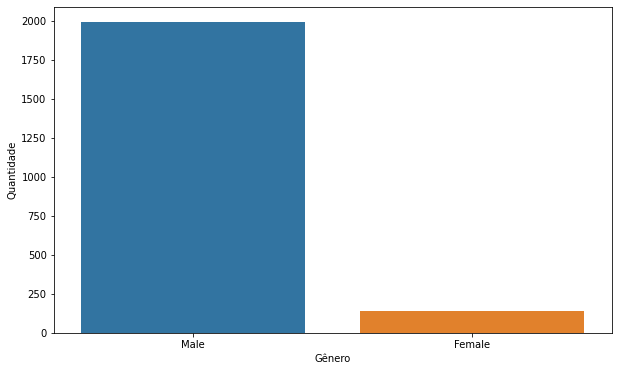

In [372]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['gender']).set(xlabel='Gênero',ylabel='Quantidade')
plt.show()

**Experiência Relevante**

O mesmo esquema das cidades, tudo nos conformes.

In [373]:
print(test['relevent_experience'].unique())

['Has relevent experience' 'No relevent experience']


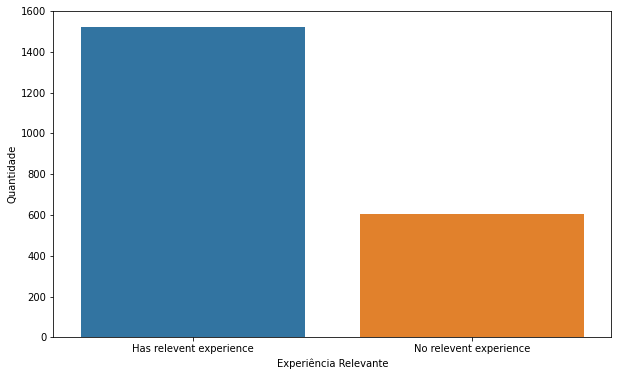

In [374]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['relevent_experience']).set(xlabel='Experiência Relevante',ylabel='Quantidade')
plt.show()

**Tipo de Curso Matriculado**

São poucos os valores faltantes, retiro os faltantes.

In [375]:
print(test['enrolled_university'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['enrolled_university'].isna()]))

no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64

Quantidade de valores nan:  31


In [376]:
test = test[test['enrolled_university'].notna()]

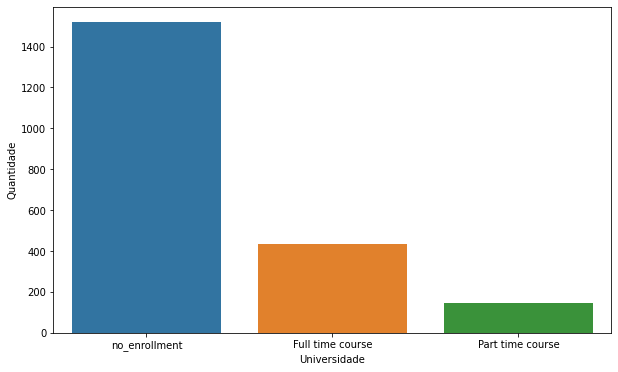

In [377]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['enrolled_university'], order=test['enrolled_university'].value_counts().index).set(xlabel='Universidade',ylabel='Quantidade')
plt.show()

**Nível Escolaridade**

Continuo da mesma forma por aqui.

In [378]:
print(test['education_level'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['education_level'].isna()]))

Graduate          1254
Masters            492
High School        219
Phd                 53
Primary School      33
Name: education_level, dtype: int64

Quantidade de valores nan:  47


In [379]:
test.dropna(subset=['education_level'], inplace=True)

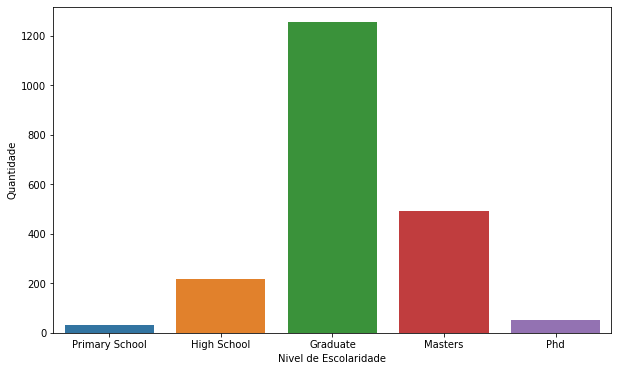

In [380]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['education_level'],order=['Primary School','High School','Graduate','Masters','Phd']).set(xlabel='Nivel de Escolaridade',ylabel='Quantidade',)
plt.show()

**Disciplina de Graduação**

Como há muitos dados faltantes, mas nenhuma coluna target, faço a substituição pela moda mesmo, considerando já a grande diferença de quantidade entre STEM e outras materias da graduação.

In [381]:
print(test['major_discipline'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['major_discipline'].isna()]))

STEM               1602
Humanities           80
Other                40
Business Degree      37
No Major             21
Arts                 17
Name: major_discipline, dtype: int64

Quantidade de valores nan:  254


In [382]:
test.loc[test['major_discipline'].isna(),'major_discipline'] = 'STEM'

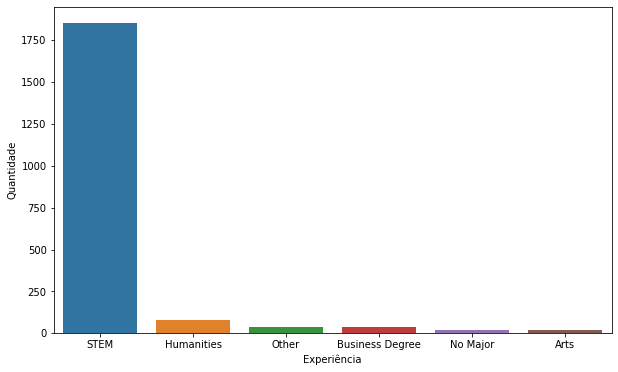

In [383]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['major_discipline'],order=test['major_discipline'].value_counts().index).set(xlabel='Experiência',ylabel='Quantidade',)
plt.show()

**Experiência**

Menos de 1% dessa coluna são np.nan, então só retiro esses valores.

In [384]:
print('Contagem: \n%s' %(test['experience'].value_counts()))
print('\nQuantidade de valores nan: ', len(test[test['experience'].isna()]))

Contagem: 
>20    373
5      159
3      147
4      136
6      126
2      118
7      112
9      109
10      96
11      84
8       76
<1      71
16      68
15      59
14      55
13      52
12      51
1       50
17      36
19      26
18      25
20      19
Name: experience, dtype: int64

Quantidade de valores nan:  3


In [385]:
test = test[test['experience'].notna()]

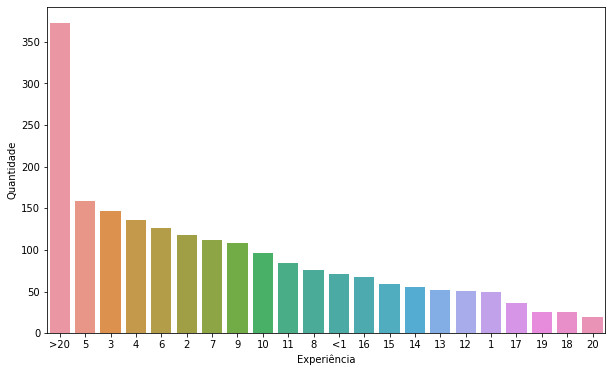

In [386]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['experience'],order=test['experience'].value_counts().index).set(xlabel='Experiência',ylabel='Quantidade',)
plt.show()

**Tamanho da Empresa**

Faço de novo a mudança no símbolo '/' da categoria '10-49'

In [387]:
print(test['company_size'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['experience'].isna()]))

50-99        329
100-500      312
10000+       216
10/49        162
<10          153
1000-4999    140
500-999       84
5000-9999     67
Name: company_size, dtype: int64

Quantidade de valores nan:  0


In [388]:
test.loc[test['company_size'] == '10/49','company_size'] = '10-49'

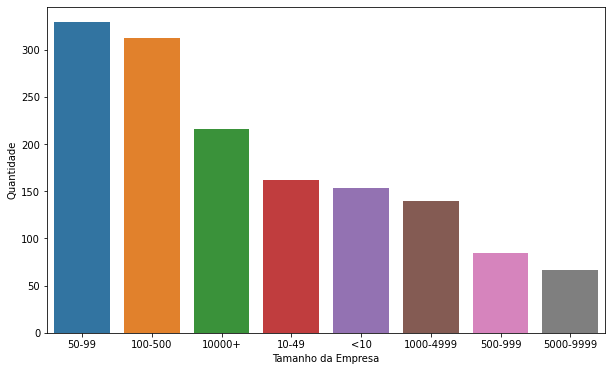

In [389]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['company_size'],order=test['company_size'].value_counts().index).set(xlabel='Tamanho da Empresa',ylabel='Quantidade',)
plt.show()

**Tipo da Companhia**

Mesmo com muitos NaNs, faço da mesma maneira que feito até agora.

In [390]:
print(test['company_type'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['company_type'].isna()]))

Pvt Ltd                1109
Public Sector           126
Funded Startup           94
Early Stage Startup      65
NGO                      53
Other                    11
Name: company_type, dtype: int64

Quantidade de valores nan:  590


In [391]:
test.loc[test['company_type'].isna(),'company_type'] = 'Pvt Ltd'

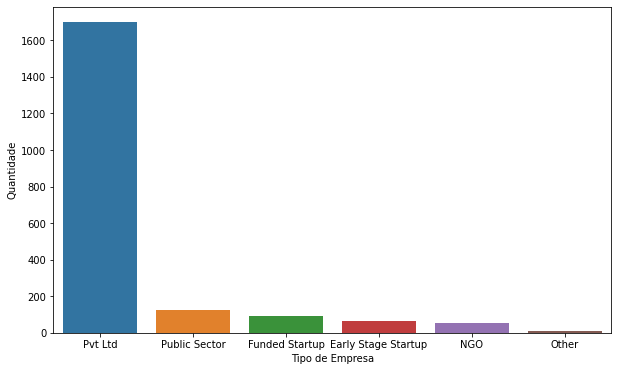

In [392]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=test['company_type'],order=test['company_type'].value_counts().index).set(xlabel='Tipo de Empresa',ylabel='Quantidade',)
plt.show()

**Tempo em anos desde o último trabalho**

Esses 39 dos valores faltantes são pouco menos de 2% do total dp dataset de teste, então só retiro essas linhas.

In [393]:
print(test['last_new_job'].value_counts())
print('\nQuantidade de valores nan: ', len(test[test['last_new_job'].isna()]))

1        861
>4       345
2        328
never    235
3        132
4        117
Name: last_new_job, dtype: int64

Quantidade de valores nan:  30


In [394]:
test = test[test['last_new_job']!= np.nan]

##### **Númericos**

De novo não há problema nos dados faltantes e sim com o problema de escala na coluna do indice de desenvolvimento das cidades.

In [395]:
test.describe()

,city_development_index,training_hours
count,2.048000e+03,2048.000000
mean,1.494385e+15,64.687500
std,3.682252e+15,60.154913
min,5.500000e-01,1.000000
25%,9.200000e-01,23.000000
50%,6.240000e+02,46.000000
75%,8.870000e+02,86.000000
max,4.870000e+16,334.000000


**Indice de Desenvolvimento da Cidade**

Para tratar o problema, uso a função auxiliar abaixo:

In [396]:
def to_scale(num):
  notation_parts = f'{num:e}'.split('e')
  coef = notation_parts[0]
  return float(coef)*10**-1

In [397]:
test['city_development_index'] = test['city_development_index'].apply(to_scale)

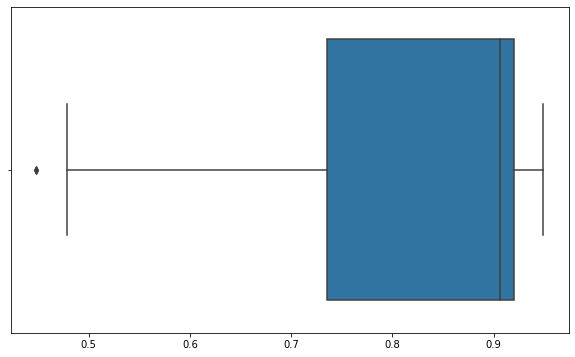

In [398]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x=test['city_development_index']).set(
    xlabel=''
)
plt.show()

Aqui não há problema com outliers, então fica por isso mesmo.

**Horas treinadas**

Vamos dar uma olhada na distribuição das horas de treino entre cada candidato

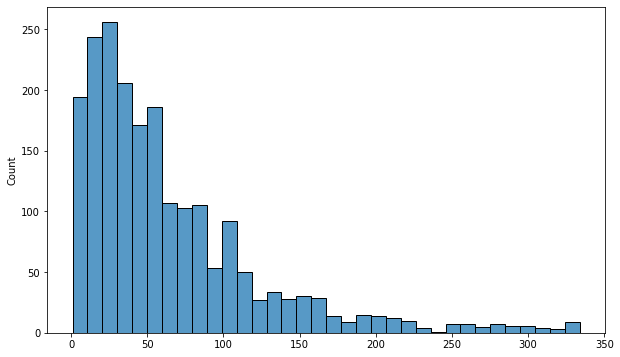

In [399]:
fig = plt.figure(figsize=(10,6))
sns.histplot(x=test['training_hours']).set(
    xlabel=''
)
plt.show()

###**Análise**

Agora partindo pra entender como as features de treino influenciam na target!

Primeiro de tudo: qual a relação entre as colunas numéricas entre si?

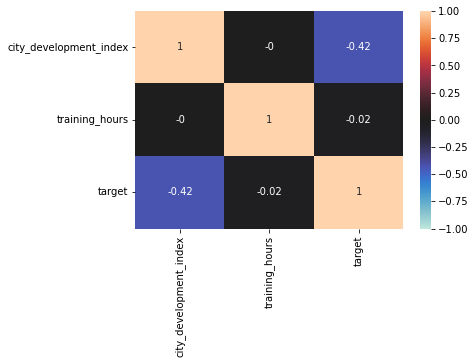

In [400]:
corr = train.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=np.round(corr.values, 2))
plt.show()

Disso é possível ver que a target tem uma correlação considerável com o índice de desenvolvimento das cidades!  Vamos dar uma olhada nessa coluna.

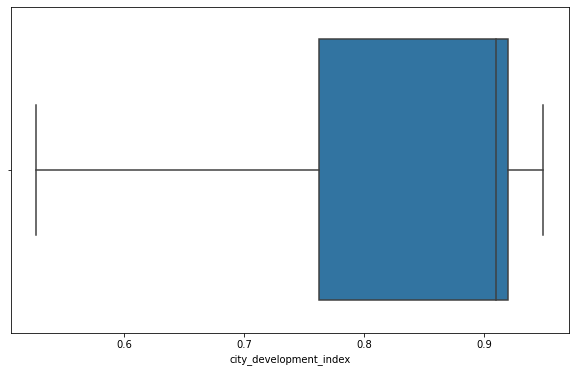

In [401]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x=train['city_development_index'])
plt.show()

Como já mostrado nesse boxplot anteriormente, metade dos dados se encontram depois do 0.9, então há uma concentração da base nesse intervalo. Isso se confirma com o histograma abaixo, além de que é possível perceber um pico perto de 0.6.

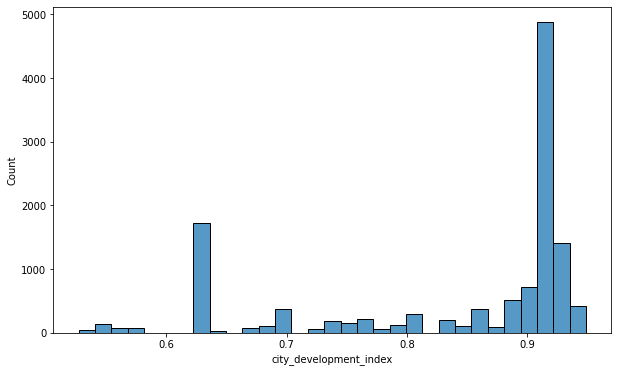

In [402]:
fig = plt.figure(figsize = (10,6))
sns.histplot(x=train['city_development_index'])
plt.show()

Para entender a correlação do Indice com nosso target, é possível dividir em dois boxplots

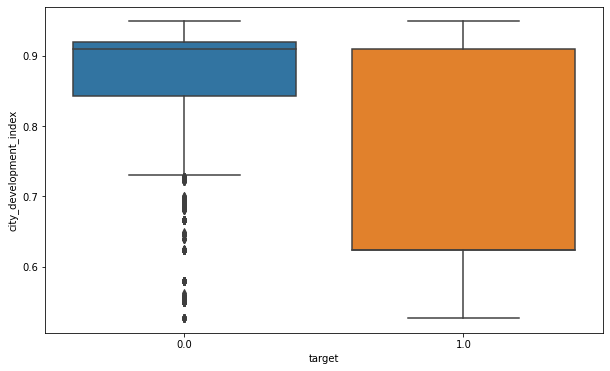

In [403]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x='target', y = 'city_development_index', data=train)
plt.show()

Dado que o valor 0 representa aqueles que não querem mudar de emprego, fica claro que metade deles se concentram em cidades de indice maior ou igual a 0.9. Enquanto isso, aqueles que querem fazer essa mudança estão mais bem distribuidos.

Como a feature de horas treinadas não tem muita correlação com a target, vou checar se há relação com alguma outra coluna. Assim consigo saber se faz sentido mantê-lá no modelo.

In [404]:
colunas_categoricas = list(train.describe(include='object').columns)

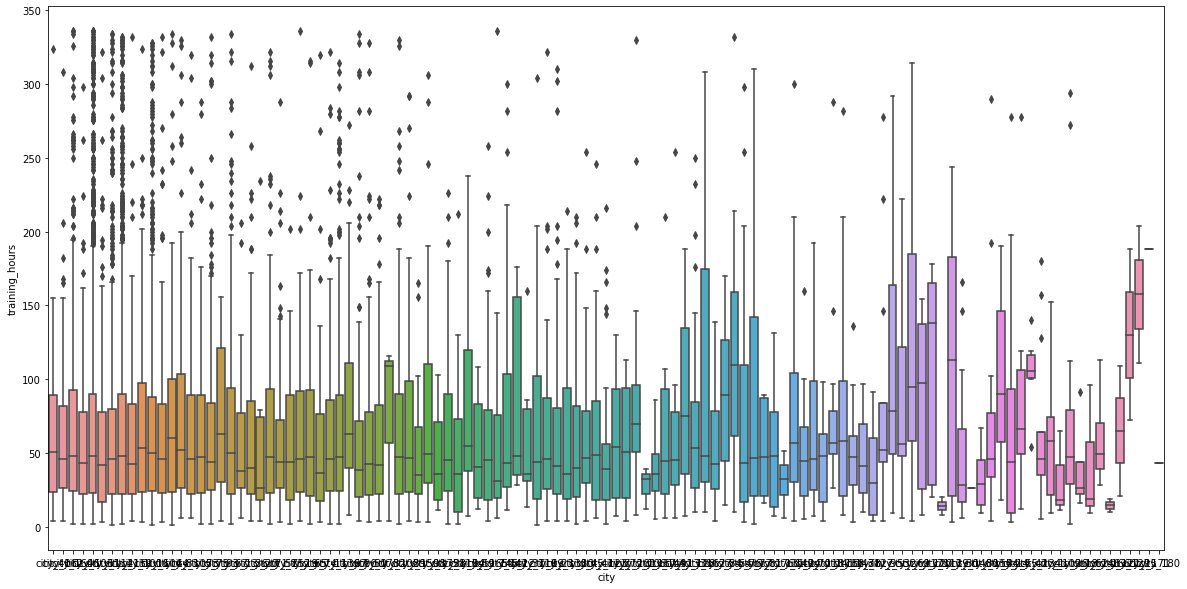

In [405]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x='city', y='training_hours', data=train)
plt.show()

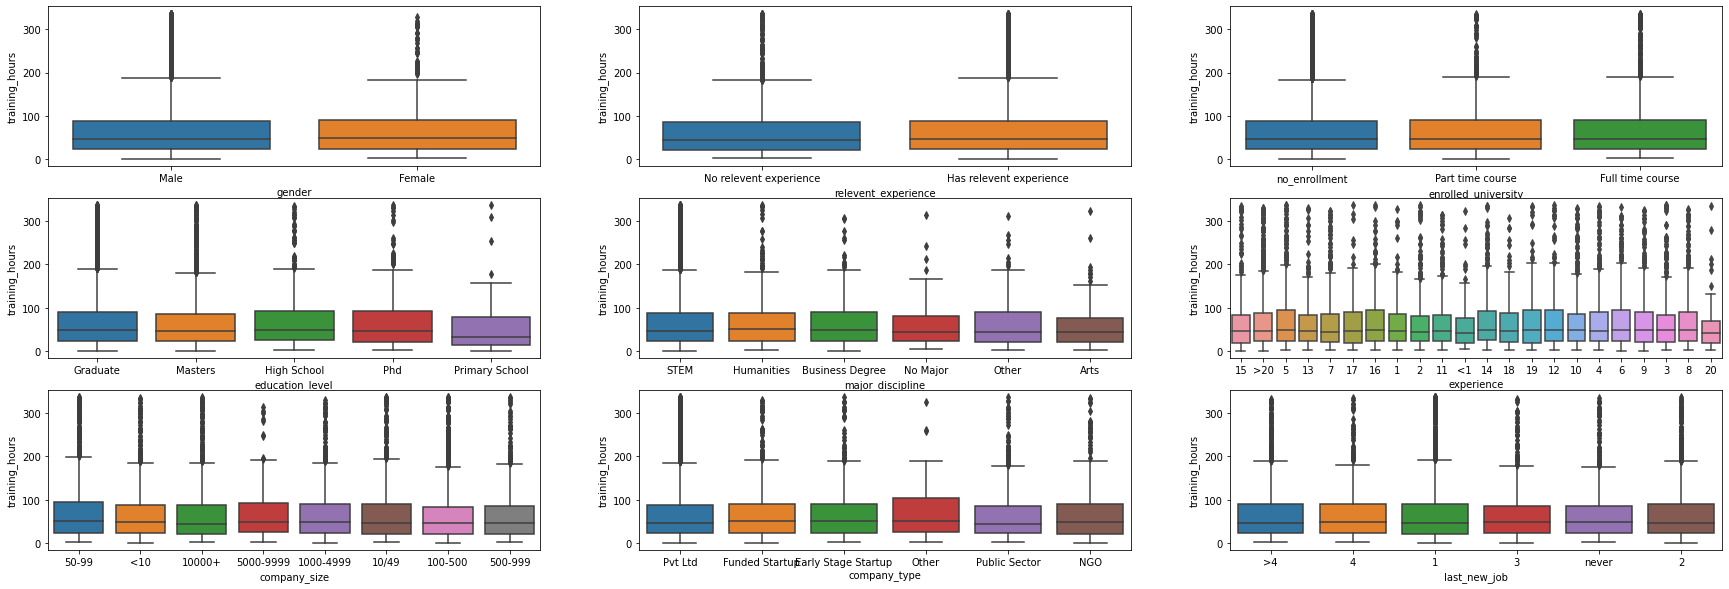

In [406]:
figure, axis = plt.subplots(3, 3, figsize=(30,10))
i = 0
j = 0

for coluna in colunas_categoricas[1:]:
  sns.boxplot(y='training_hours', x=coluna, data=train, ax=axis[j,i])
  if i < 2:
    i+=1
  else:
    j+=1
    i=0

Disso, é possível perceber que as horas treinadas não parecem ter muita correlação com outras features além das cidades. Porém, como dá pra ver no gráfico seguinte, a cidade em que o candidato está parece influenciar sua vontade de mudar de emprego. Logo, opto por manter a coluna.

Sigo agora olhando as relações entre o target e as colunas categóricas da nossa base de treino.

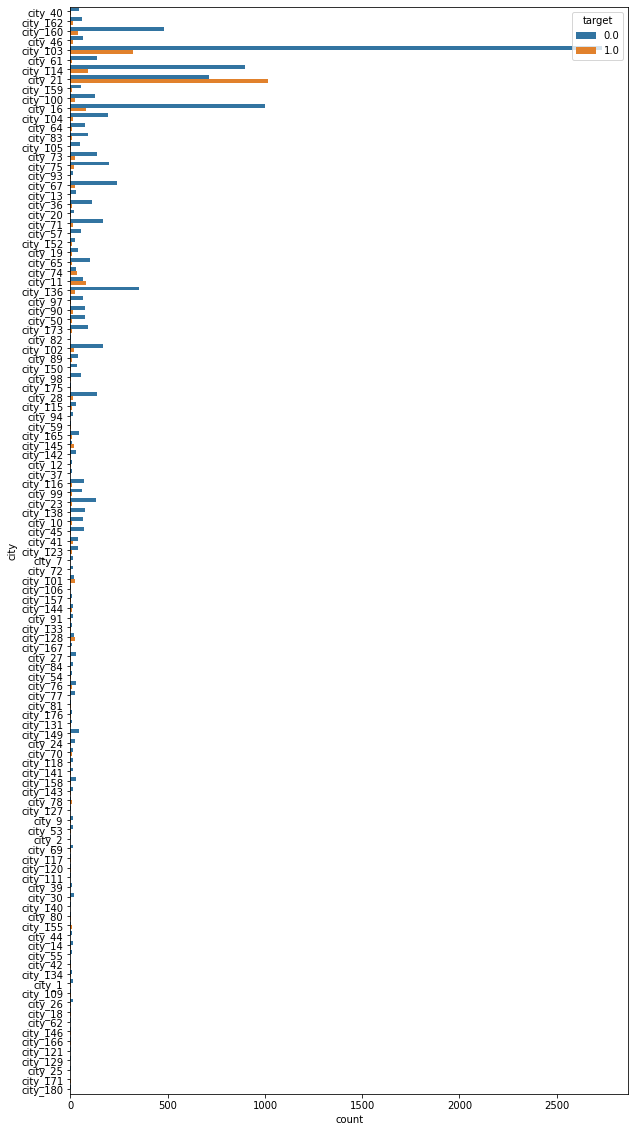

In [407]:
fig = plt.figure(figsize=(10,20))
sns.countplot(y='city', hue='target', data=train)
plt.show()

Da pra notarmos que a maioria dos candidatos não quer mudar de emprego, mas as proporções entre cada categoria do target mudam entre cidades. Principalmente se olharmos as cidades 103 e 21: a primeira concentra a maior quantidade daqueles que querem mudar de emprego, enquanto o contrário acontece na última. Disso, se um candidato for mudar de emprego, há mais chances de morar na cidade 21.

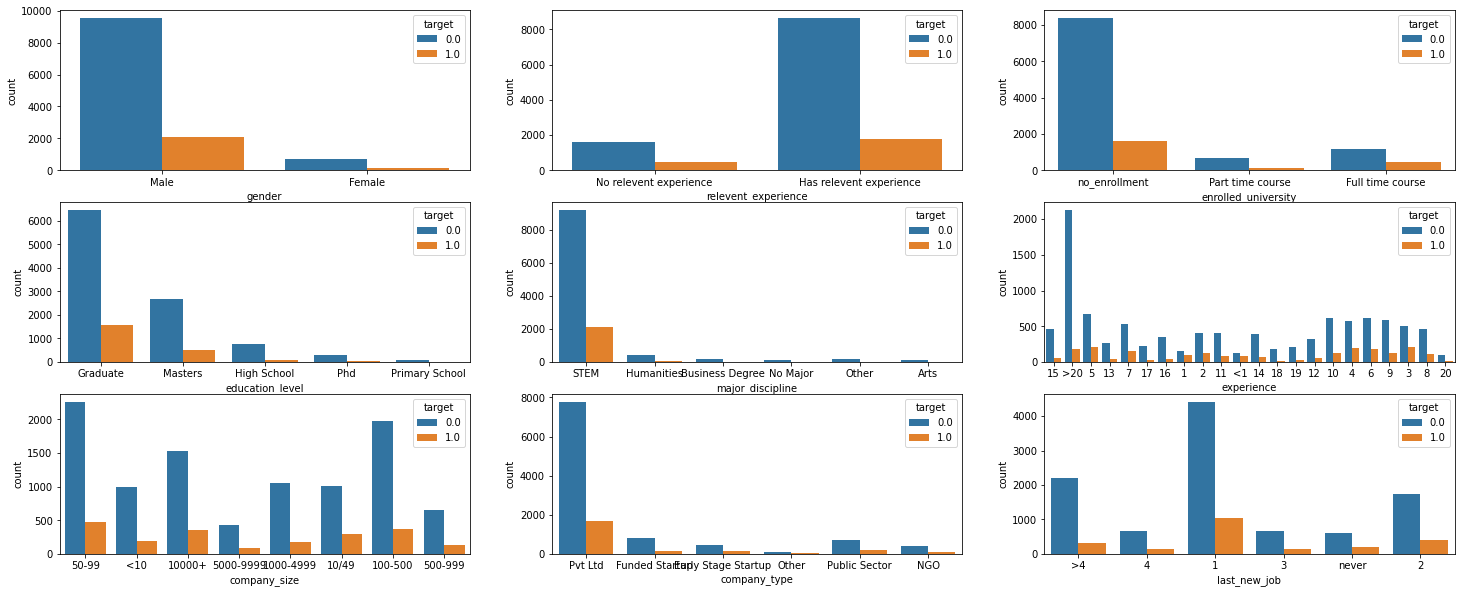

In [408]:
figure, axis = plt.subplots(3, 3, figsize=(25,10))
i = 0
j = 0

for coluna in colunas_categoricas[1:]:
  sns.countplot(x=coluna, hue='target', data=train, ax=axis[j,i])
  if i < 2:
    i+=1
  else:
    j+=1
    i=0

Agora, considerando as outras features, é possível perceber que a relação com a target não é tão explicita assim. Por exemplo, ainda que as quantidades sejam diferentes a distribuição dos que querem ou não mudar de emprego por gênero, tem proporções parecidas e isso se segue em outras categorias como: experiência, tipo de graduação, nível educacional, tipo de empresa e tempo desde o último trabalho.

É possível notar também que independente de querer sair do emprego, quase todos os candidatos cursam ou cursaram STEM e/ou fazem parte de empresas do tipo Pvt Ltd. Outra coisa é que ao olharmos o tempo de experiência, aqueles com menor tempo de carreira são os que mais tem vontade de trocar de emprego.

##**Predição**

Agora, podemos partir pra treinar nosso modelo de predição, que deve lidar com classifição.

Pra isso, vou testar quatro modelos de classificação:


*   KNN
*   Regressão Logística
*   Árvore de Decisão
*   Random Forest



Importando algumas bibliotecas:

In [409]:
from sklearn.model_selection import train_test_split 

Nosso dataset tem é feito basicamente com dados categóricos, então é preciso passá-los por one hot encoding. Para que o dataset de teste e o de treino tenham o mesmo tamanho ao final, passo os dois juntos por esse processo.

In [410]:
len(train)

12504

In [411]:
encoded_data = pd.get_dummies(pd.concat([train,test]))
encoded_train_data = encoded_data.iloc[:12504]
encoded_test_data = encoded_data.iloc[12504:]

In [412]:
X = encoded_train_data.drop('target',axis='columns')
y = encoded_train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.3,stratify=y)

###**KNN**

In [413]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Pra criar o modelo, vamos encontrar o melhor K para ele.

In [414]:
k_range = range(5, 35,5)

for k in k_range:
  model = KNeighborsClassifier(k)
  score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))

  print(f'K = {k} com score de {score}')

K = 5 com score de 0.8119296803652969
K = 10 com score de 0.8292965427266796
K = 15 com score de 0.8302110893672537
K = 20 com score de 0.8280391389432487
K = 25 com score de 0.8272396607958253
K = 30 com score de 0.823012002609263


Vamos escolher K = 15

In [415]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [416]:
y_predicted_knn = knn.predict(X_test)

print(f'Acurácia: {accuracy_score(y_test, y_predicted_knn)}')

Acurácia: 0.8318230277185501


###**Regressão Logística**

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
logitreg = LogisticRegression(max_iter=1000)
logitreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [419]:
y_predicted_logitreg = logitreg.predict(X_test)

print(f'Acurácia: {accuracy_score(y_test, y_predicted_logitreg)}')

Acurácia: 0.8336886993603412


###**Árvore de Decisão**

In [420]:
from sklearn.tree import DecisionTreeClassifier

In [421]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [422]:
y_predicted_dt = dt.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_dt)}')

Acurácia: 0.7649253731343284


###**Random Forest**

In [423]:
from sklearn.ensemble import RandomForestClassifier

In [424]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [425]:
y_predicted_rf = rf.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_rf)}')

Acurácia: 0.8382196162046909


###**Comparações**

**Matriz de Confusão**

In [426]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

Primeiro, podemos olhar pra matrix de confusão de cada um dos modelos. Disso, podemos tirar os principais candidatos a escolhidos, sendo eles o modelo de Regressão Logística e o de Random Forest, que tem as melhores métricas.

KNN
Acurácia: 83.18%
Recall:  14.48%
Precisão: 62.58%
F1: 23.52%



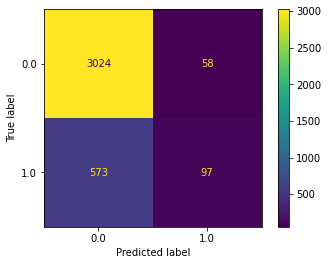


Regressão Logística
Acurácia: 83.37%
Recall:  45.37%
Precisão: 54.09%
F1: 49.35%



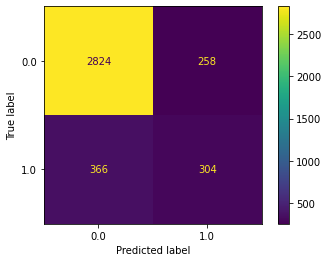


Árvore de Decisão
Acurácia: 76.49%
Recall:  38.36%
Precisão: 35.40%
F1: 36.82%



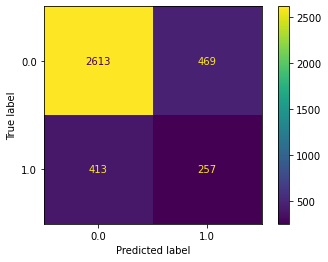


Random Forest
Acurácia: 83.82%
Recall:  46.42%
Precisão: 55.64%
F1: 50.61%



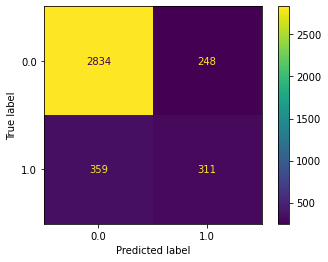

In [427]:
print(f'KNN\nAcurácia: {accuracy_score(y_test, y_predicted_knn)*100:.2f}%\nRecall:  {recall_score(y_test, y_predicted_knn)*100:.2f}%\nPrecisão: {precision_score(y_test, y_predicted_knn)*100:.2f}%\nF1: {f1_score(y_test, y_predicted_knn)*100:.2f}%\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_knn)
plt.show()

print(f'\nRegressão Logística\nAcurácia: {accuracy_score(y_test, y_predicted_logitreg)*100:.2f}%\nRecall:  {recall_score(y_test, y_predicted_logitreg)*100:.2f}%\nPrecisão: {precision_score(y_test, y_predicted_logitreg)*100:.2f}%\nF1: {f1_score(y_test, y_predicted_logitreg)*100:.2f}%\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_logitreg)
plt.show()

print(f'\nÁrvore de Decisão\nAcurácia: {accuracy_score(y_test, y_predicted_dt)*100:.2f}%\nRecall:  {recall_score(y_test, y_predicted_dt)*100:.2f}%\nPrecisão: {precision_score(y_test, y_predicted_dt)*100:.2f}%\nF1: {f1_score(y_test, y_predicted_dt)*100:.2f}%\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_dt)
plt.show()

print(f'\nRandom Forest\nAcurácia: {accuracy_score(y_test, y_predicted_rf)*100:.2f}%\nRecall:  {recall_score(y_test, y_predicted_rf)*100:.2f}%\nPrecisão: {precision_score(y_test, y_predicted_rf)*100:.2f}%\nF1: {f1_score(y_test, y_predicted_rf)*100:.2f}%\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_rf)
plt.show()

**Curva ROC**

In [428]:
from sklearn.metrics import RocCurveDisplay

Pelas curvas ROC plotadas abaixo, os modelos de Regressão e RF são os que melhor distinguem as duas classes. Baseado nisso, e nas matrizes de confusão, o modelo escolhido é o Random Forest.

KNN



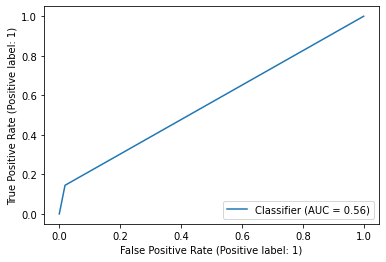


Regressão Logística



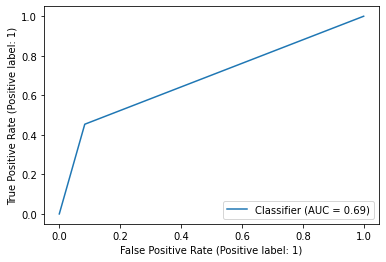


Árvore de Decisão



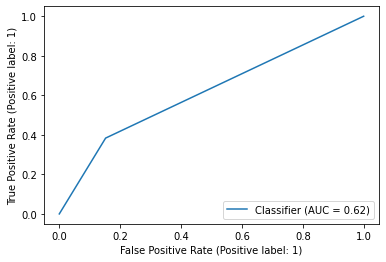


Random Forest



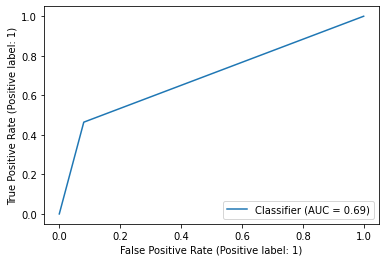

In [429]:
print('KNN\n')
RocCurveDisplay.from_predictions(y_test, y_predicted_knn)
plt.show()

print('\nRegressão Logística\n')
RocCurveDisplay.from_predictions(y_test, y_predicted_logitreg)
plt.show()

print('\nÁrvore de Decisão\n')
RocCurveDisplay.from_predictions(y_test, y_predicted_dt)
plt.show()

print('\nRandom Forest\n')
RocCurveDisplay.from_predictions(y_test, y_predicted_rf)
plt.show()

###**Testando o Modelo**

Agora, vamos utilizar nosso dataset de teste

In [430]:
encoded_test_data.drop('target', axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [431]:
test_predicted = rf.predict(encoded_test_data)
test['predicted_target'] = test_predicted

**Comparando o resultado com os dados de treino**

Primeiro, vou checar como foi proporção entre os que querem ou não mudar de emprego. É possível ver que ela difere um pouco do treino e do teste, mas nada muito grande, então tudo certo já que não é só isso que garante um bom modelo.

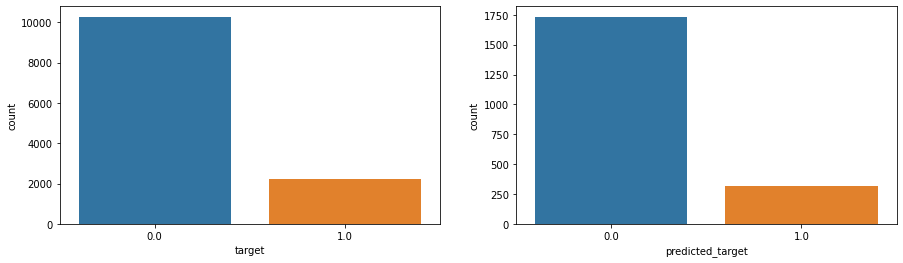

In [432]:
figure, axis = plt.subplots(1, 2, figsize=(15,4))
sns.countplot(x='target', data=train, ax=axis[0])
sns.countplot(x='predicted_target', data=test, ax=axis[1])
plt.show()

As variáveis com maior interação com o target eram o Indice de Desenvolvimento das Cidades, as próprias cidades e a experiencia.

As cidades mais proeminentes antes foram a cidade 103, com maior concentração daqueles satisfeitos com o emprego, e a 46, com mais daqueles que buscavam mudança. 

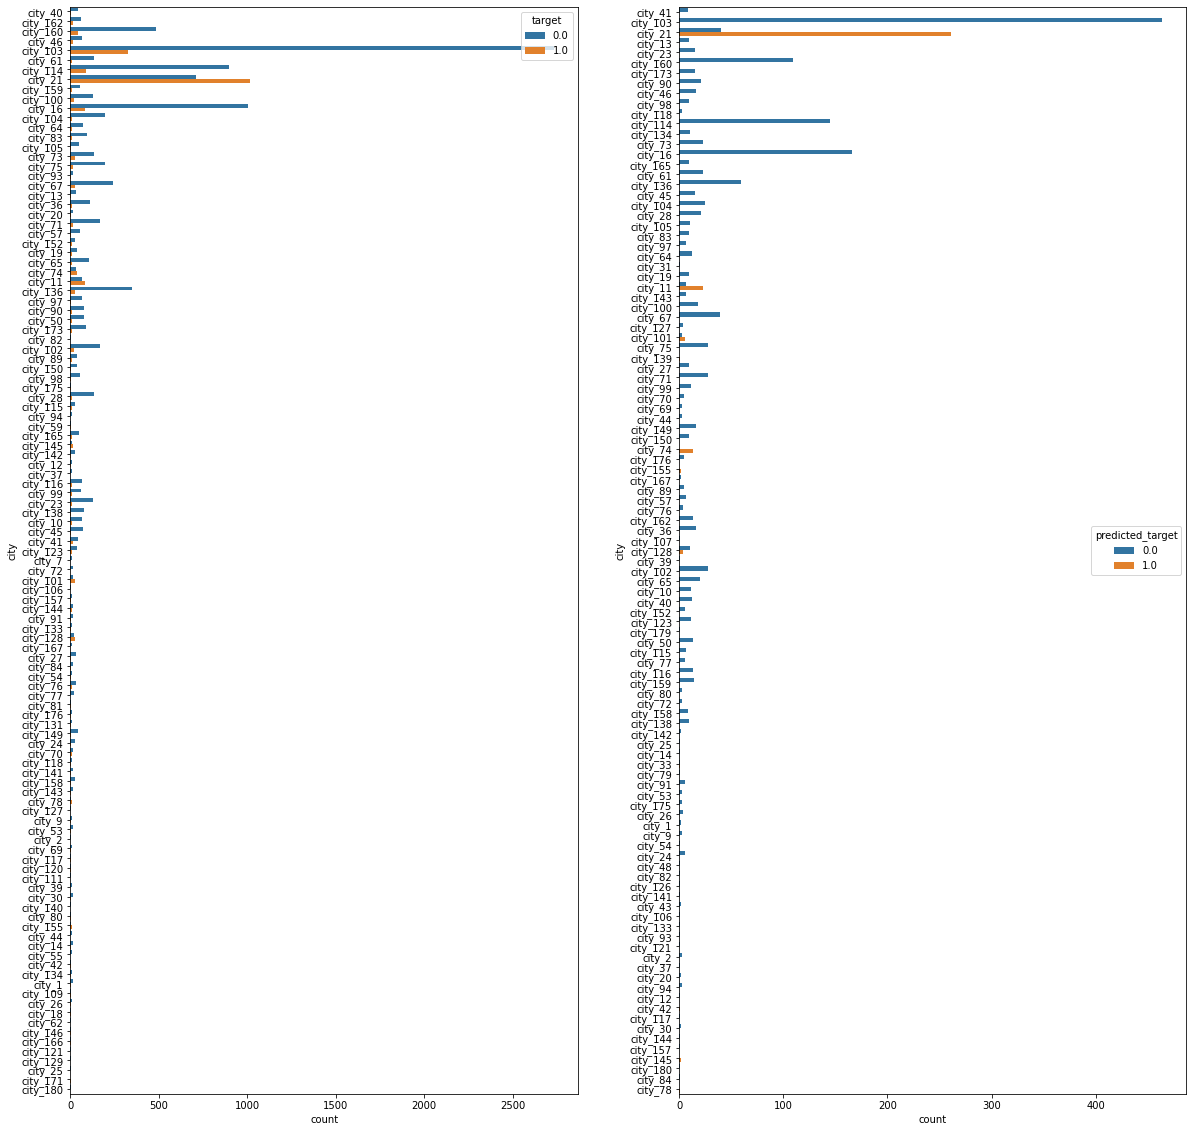

In [433]:
figure, axis = plt.subplots(1, 2, figsize=(20,20))
sns.countplot(y='city', hue='target', data=train,ax=axis[0])
sns.countplot(y='city', hue='predicted_target', data=test, ax=axis[1])
plt.show()

A distribuição dos que querem mudar ou não de emprego por indice de desenvolvimento também é parecida, ainda que não há nenhum depois dos mais ou menos 0.63. Isso se deve a pouca quantidade da própria amostra de treino, como visto abaixo

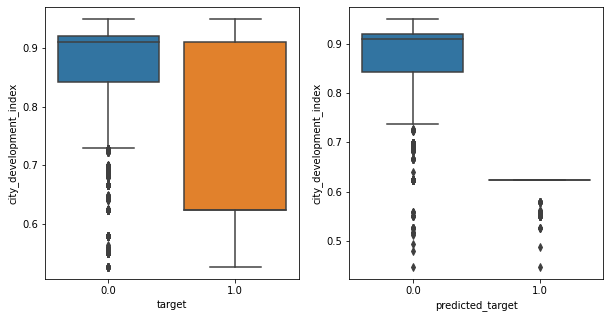

In [434]:
figure, axis = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(y='city_development_index', x='target', data=train,ax=axis[0])
sns.boxplot(y='city_development_index', x='predicted_target', data=test, ax=axis[1])
plt.show()

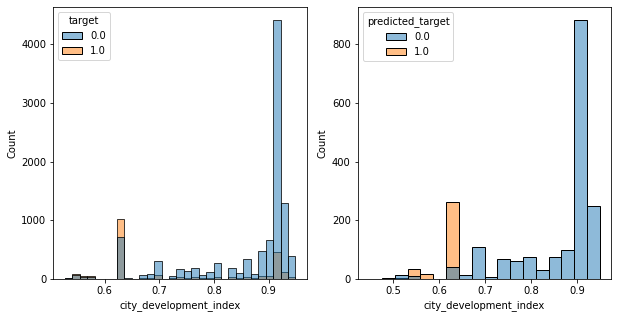

In [435]:
figure, axis = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(x='city_development_index', hue='predicted_target',data=test,ax=axis[1])
sns.histplot(x='city_development_index', hue='target',data=train,ax=axis[0])
plt.show()

Da mesma forma, a distribuição entre a quantidade de experiência também é bem similar ao original.

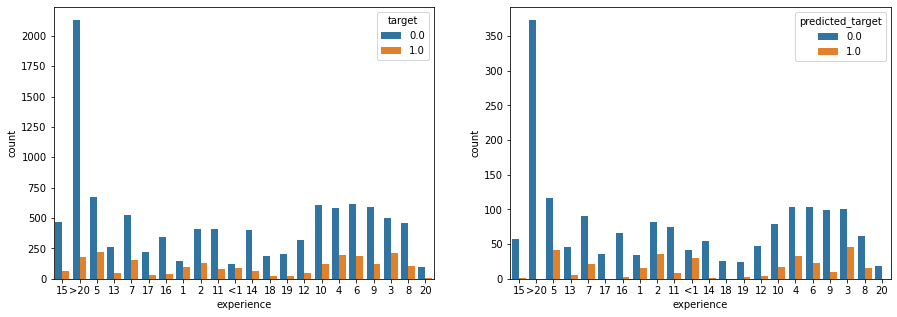

In [436]:
order = train['experience'].unique()
figure, axis = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='experience', hue='target', data=train,ax=axis[0], order=order)
sns.countplot(x='experience', hue='predicted_target', data=test, ax=axis[1], order=order)
plt.show()